# GOAL
Exploratory data analysis to better understand the data before running various modeling algorithms.

<br/>
<br/>
<br/>

In [1]:
import pandas as pd
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Seaborn Styles
sns.set(rc={'figure.figsize':(10,7)}) # figure sizes
sns.set_style("whitegrid") # setting the style 
sns.set_palette('colorblind') ## Always colorblind

In [79]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


In [104]:
def get_ecdf_plot(data_column, axis_labels, axis=None, color=None,  title=None,xlim=None, ylim=None, bins=None):
    sns.set_style("whitegrid")
    
    x_var, y_var = ecdf(data_column)
    
    if axis:
        a = axis
    else:
        a = plt
    a.plot(y_var*100,x_var, color=color, marker = '+')

    a.xlabel(axis_labels[0])
    a.ylabel(axis_labels[1])

    a.xlim(xlim)
    a.ylim(ylim)

    a.title(title)

    a.margins(0.2)

In [3]:
PATH = 'data/'

## DATA

TRAIN

In [4]:
df_train = pd.read_csv(f'{PATH}train.csv', low_memory=False)

TEST

In [5]:
test = pd.read_csv(f'{PATH}test.csv', low_memory=False)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [7]:
cat_columns = [col for col in df_train.columns if df_train[col].dtype == 'O']
cat_columns

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [9]:
id_cols = ["ID"]
y = df_train.y
exclude = id_cols + ['y'] + cat_columns


num_columns = df_train.drop(exclude, axis = 1).columns

<br/>
<br/>
<br/>
<br/>



### Checking for missing data 

In [13]:
percent_missing_date_per_column = df_train.isnull().sum()/len(df_train)  # No columns with missing data
percent_missing_date_per_column.head(10)

ID    0.0
y     0.0
X0    0.0
X1    0.0
X2    0.0
X3    0.0
X4    0.0
X5    0.0
X6    0.0
X8    0.0
dtype: float64

In [15]:
# How many columns have missing data
np.sum(percent_missing_date_per_column > 0 )

0

Conclusion : None of the columns have missing data. 

<br/>
<br/>
<br/>
<br/>



### Predictor variables

CATEGORICAL COLUMNS

In [8]:
for col in cat_columns:
    print(f'{col} has {df_train[col].nunique()} categories')

X0 has 47 categories
X1 has 27 categories
X2 has 44 categories
X3 has 7 categories
X4 has 4 categories
X5 has 29 categories
X6 has 12 categories
X8 has 25 categories


<br/>
<br/>
<br/>
NUMERICAL COLUMNS

We have been told that the variables with 0/1 are binary. Lets see if all variables have both 0 and 1 values.

In [73]:
unique_values_per_columna = []
for col in num_columns:
    unique_values_per_columna.append(df_train[col].nunique())

In [75]:
pd.Series(unique_values_per_columna).value_counts()

2    356
1     12
dtype: int64

12 binary variables have only one value for all records.  
May be such variables don't contribute much to the information the data 
provides. May be we should exclude them.  
Choice of the the ML algorithm will decide this. 

<br/>
<br/>
<br/>
<br/>



### Target

In [22]:
y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

Text(0.5, 0, 'Time in seconds')

<Figure size 864x432 with 0 Axes>

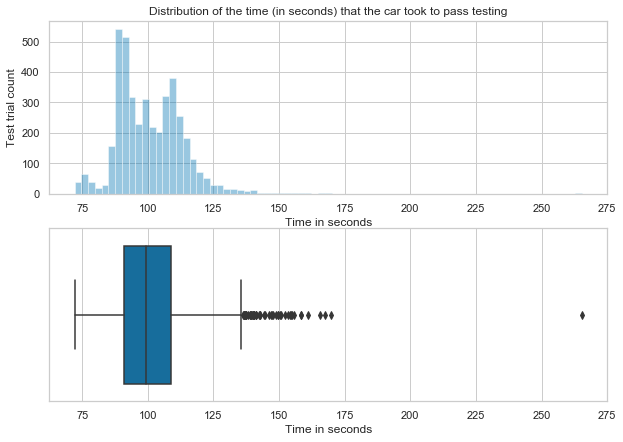

In [21]:
plt.figure(figsize=(12, 6))
fig , (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
sns.distplot(y, kde=False, ax = ax1, bins = 75)
sns.boxplot(y, ax= ax2)

ax1.set_title("Distribution of the time (in seconds) that the car took to pass testing")
ax1.set_ylabel("Test trial count")

ax1.set_xlabel('Time in seconds')
ax2.set_xlabel('Time in seconds')

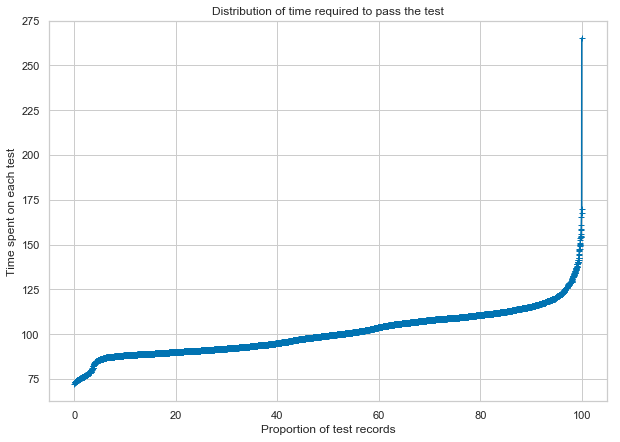

In [105]:
get_ecdf_plot(y
              , axis_labels=['Proportion of test records','Time spent on each test']
              , title='Distribution of time required to pass the test')

<br/>
<br/>

<br/>
<br/>
<br/>
<br/>

#### Validating train-test split

Something interesting I learned from https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-mercedes/notebook .

We must test if the train test split is done well and not split using an order on the ID column. Meaning the split of records must be random.  
The way I normally tested this, was to see if the distribution of the target variable is similar in the train and test datasets.  
But the test dataset here lacked the `y` variable.  
Was sort of a duh-uh moment for me.

In [108]:
tr = df_train.copy()
te = test.copy()

In [113]:
tr["type"] = 'TRAIN'
te["type"] = 'TEST'

is_random_split = pd.concat([tr,te], axis=0).loc[:, ["ID", "type"]]

is_random_split.head()

,ID,type
0,0,TRAIN
1,6,TRAIN
2,7,TRAIN
3,9,TRAIN
4,13,TRAIN


Text(0.5, 1.0, 'Distribution of ID variable across train and test sets')

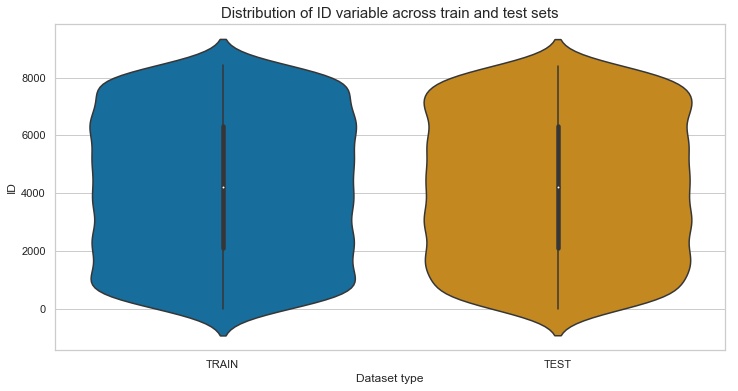

In [129]:
plt.figure(figsize=(12,6))

ax = sns.violinplot(x="type", y='ID', data=is_random_split)
ax.set_xlabel("Dataset type")
ax.set_ylabel('ID')
ax.set_title("Distribution of ID variable across train and test sets", fontsize=15)

Since the distribution of the two datasets looks similar, it is inferred that the train test split provided in the competition was done randomly.